<a href="https://colab.research.google.com/github/JayeonKangNature/2022_Summer_Internship/blob/main/Self_Study_Code/week1_Introduction_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0. Introduction PyTorch**

Jayeon Kang


In [ ]:
import torch

Basic Tensor Manipulations

In [ ]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


5x3 matrix is created filled with zeroes and, quary its data type to find out that the zeros are the datatype is 32-bit floating point numbers, <br>which is the default PyTorch.

As I want integers instead, override the defalts:

In [ ]:
i = torch.ones((5,3), dtype=torch.int16)
print(i)
print(i.dtype)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
torch.int16


You can see change of defulat (data type and filled number)

It is common to initialize learning weight randomly, often with sepecific seed for the PRNG (Pseudo-Random Numbers Generators) for reproductivility of resutls:

In [ ]:
torch.manual_seed(1729)
# function to fix random seed, for reproducibilty https://glaringlee.github.io/notes/randomness.html#reproducibility
# When you ask for random number in pytorch (with torch.rand() or t.uniform_() for example) these random numbers are generated from a specific algorithm.
#A nice property of this algorithm is that you can fix it’s starting point and it will always generate the same random numbers afterwards. That way, you can have reproducible code even with random functions in it.
#The seed is just this starting point.
r1 = torch.rand(2, 2)
print('A random tensor:')
print(f'r1 = {r1}')

# Let's repeat doing .rand
r2 = torch.rand(2,2)
print(f'r2 = {r2}')

# Then, refixing seed and randomize with same value above
torch.manual_seed(1729) # re-seeding with same number above
r3 = torch.rand(2,2)
print(f'r3 = {r3}')

#when you look at those 3 cases,
#r1 and r2 has different result but r3 are same with r1

r4 = torch.rand(2,2)
print('r4 =',r4)

torch.manual_seed(1730)
r5 = torch.rand(2,2)
print('r5 =',r5)


A random tensor:
r1 = tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
r2 = tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
r3 = tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
r4 = tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
r5 = tensor([[0.9689, 0.5078],
        [0.4918, 0.2002]])


PyTorch tensors perform arithmatric operations intuitively.<br> Tensors of similar shapes may be added, multiplied, etc.<br> Operations with scalars are distributed over the tensor:

In [ ]:
ones = torch.ones(2, 3)
print(ones,'\n')

twos = torch.ones(2,3) * 2
print(twos)
print('explain: you will see multiplied all elements with 2')

threes = ones + twos
print(threes)
print('explain: you will see a matrix summed with twos and ones \n')
print(threes.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

tensor([[2., 2., 2.],
        [2., 2., 2.]])
explain: you will see multiplied all elements with 2
tensor([[3., 3., 3.],
        [3., 3., 3.]])
explain: you will see a matrix summed with twos and ones 

torch.Size([2, 3])


In [ ]:
torch.manual_seed(1729)
r1 = torch.rand(2,3)
r2 = torch.rand(3,2)
print('r1 =',r1)
print('r2 =',r2)
print('r1 size:',r1.shape,'r2 size:', r2.shape)
r3 = r1 + r2
print('r3 =',r3)
print('explain: if differnet matrixs are calculated, error is occured. That is that to cacluate among matrices those all matrices must be same size')

r1 = tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
r2 = tensor([[0.2332, 0.4047],
        [0.2162, 0.9927],
        [0.4128, 0.5938]])
r1 size: torch.Size([2, 3]) r2 size: torch.Size([3, 2])


RuntimeError: ignored

Here is small sample explaination of the mathmatical operations available:

In [ ]:
r = torch.rand(2, 2) - 0.5 * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathmatical operations are supported:
print('\nAbsolute value of r by using .abs():')
print(torch.abs(r))

# ...as are trigometirc functions:
print('\nInverse sine of r by using .asin():')
print(torch.asin(r))

# ...and linear algebra operations like determinant and sinvular value decomposition
print('\nDeterminant of r by using .det():')
print(torch.det(r))

# ...and statistical and aggregate operations:
print('\nAverage andn standard deviation of r by using .std_mean():')
print(torch.std_mean(r))
print('\nMaximum value of r by using .max():')
print(torch.max(r))

A random matrix, r:
tensor([[-0.3872, -0.8481],
        [-0.9547, -0.4965]])

Absolute value of r by using .abs():
tensor([[0.3872, 0.8481],
        [0.9547, 0.4965]])

Inverse sine of r by using .asin():
tensor([[-0.3976, -1.0123],
        [-1.2685, -0.5196]])

Determinant of r by using .det():
tensor(-0.6173)

Average andn standard deviation of r by using .std_mean():
(tensor(0.2725), tensor(-0.6716))

Maximum value of r by using .max():
tensor(-0.3872)


There's a good deal more to know about the power of PyTorch tensors, including how to set them up for parallel computation on GPU - we'll be going into more depth in another video

**1. Building model in PyTorch**

In [ ]:
import torch # for all things PyTorch
import torch.nn as nn # for torch.nn.Module, the parent object for PyTorch modles
import torch.nn.functional as F # for the activation function

Convolutional neural netork work process (LeNet-5 as example)

In [ ]:
class LeNet(nn.Module): # from nn.Module, Conv2d and Linear layer classes inherit
  def __init__(self):  # to initiate its layers, and loads any data artifacts it might need
          # ex. an NLP might load a vocabulary
          # * Natural Language Processing (NLP): a pre-eminent AI technology
          # that enables machines to read, decipher, understand, and make sense of human languages
    super(LeNet, self).__init__()
    # 1 input image channel with balck and white, 6 ouput chennels, 3x3 squre convolutioni
    # kernel
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x): # this function do acutal computation.
                        # => as entering inputs throgh network layers and many fucntions return a lot of ouputs (= prediction)
    # Max pooling over a (2, 2) window
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    # If the size is a square you can only specify a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

In [ ]:
net = LeNet()
print(net) # what does the obect tell us about itself?

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Above thing initiate the LeNet class. <br>
As printing net, subclass of torch.nn.Module report the layers it has created and their shapes and parameters. <br>
If wnat to get the gist of its processing, this can provide a handy overvieuw of model.

In [ ]:
input = torch.rand(1,1,32,32) # stand-in for a 32x32 black and white image
print('<input information> \n - input shape')
print(input.shape,'\n')

<input information> 
 - input shape
torch.Size([1, 1, 32, 32]) 



Create a dummy input representing 32 x 32 image with 1 color channel. <br>
This can load an image tile and converting it to a tensor of this shape.<br>
<br>
At our tensor, extra demension is observed. This extra dimension is called as 'the Batch demension'.<br>
Batch size: the number of training examples utilized in one iteration.<br>
<br>
PyTorch model assume they are working on batches of data.<br>
For example, <br>
If input.shape reprot [16, 1, 32, 32], a batch of 16 of given image tiles.<br>
<br>
In our case, becasue only using one image, we create a batch of 1 with shape (1, 1, 32, 32).

In [ ]:
output = net(input) # we do not call directly forward() function
print('<ouput information>\n - ouput')
print(output,'\n - ouput sahpe')
print(output.shape)

<ouput information>
 - ouput
tensor([[-0.0926,  0.0878,  0.0033, -0.0239,  0.0661, -0.0982, -0.0824, -0.0701,
         -0.0400, -0.0096]], grad_fn=<AddmmBackward0>) 
 - ouput sahpe
torch.Size([1, 10])


By using net(input) function, we do model inference.\
model inference: The process of using a trained model to infer a result from live data.<br>

The output of this call represents the model's confidnece that the input represents a particular digit. Since this instance of the mdoels hasn't learned anything yet, we shouldn't expect to see any signal in the output.

**2. Datasets and dataloaders**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    (transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))))

* transforms.ToTensor(): Convert images loaded by Pillow into PyTorch tensors. <br>
Pillow image: PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities. The Image module provides a class with the same name which is used to represent a PIL image.
* transforms.Normalize(): manupulate the values in our tensors so that their average is 0 and their standard deviation is 0.5.<br>
Most activation functions have their strongest gradients around x = 0, so centering our data there can speed learning.

Then, create an instance of the CIFAR10 dataset. This is a set of 32x32 color images tiles representing 10 classes of objuects: 6 of animals (bird, cat, deer, dog, frog, horse) and 4 of vechicles (airplane, automobile, ship, truck):

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [ ]:
print('infromation')
print(trainset)

infromation
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


Above code is example for creating a dataset object in PyTorch.<br>
Downloadable datasets are subclasses of torch.utils.data.Dataset.<br>
Dataset classes in PyTorch include the downloadabable datasets in TorchVision, Torchtext, and TorchAudio.

When we instantiate our dataset, we nned to tell it a few tings:<br>
* The filesystem path to wehre we want the data to go.
* Whether or not we are using this set for training: most datasets will be split into training and test substes.
* Whether we would like to download the dataset if we haven't already.

Once dataset is given, give it to the 'DataLoader':

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True,num_workers=2)

* Dataseta subclasses: it wraps access to the data and is specialized to the type of data it's serving
* Dataloader: knows nothing about the data, but organize the input tensors served by the Dataset into batches with the parameter that is determined by you.
<br><br>
In our case,
- batch_size = 4: give us batches of 4 images from trainset.
- shuffle = True: randomizing our order.
- num_wrkers = 2: spin up two workers to load data from disk.<br>
num_workers denotes the number of processes that generate batches in parallel.

car frog car ship


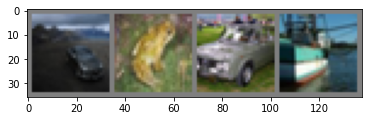

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = (
    'plane','car','bird','cat','deer','dog','frog','horse','ship','truck'
)

def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

# get some random training images
dataiter = iter(trainloader)
images, lables = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join(classes[lables[j]] for j in range(4)))

Above code do to visulalize the baches our DataLoader serves

**3. Training your PyTorch model**<br>
3.1. Training and test

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Process to train PyTorch model

First, Transform

In [ ]:
transform = transforms.Compose(
    (transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)))
)


Second, Training

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True,num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


Third, Test

In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False,num_workers=2)

classes = (
    'plane','car','bird','cat','deer','dog','frog','horse','ship','truck'
)

Files already downloaded and verified


Fourth, Checking the output from DataLoader

plane frog ship ship


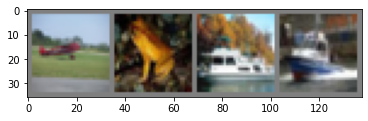

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# make function to visualize an image

def imgshow(img):
  img = img/ 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(trainloader)
images, lables = dataiter.next()

#show images
imgshow(torchvision.utils.make_grid(images))
#print lables
print(' '.join(classes[lables[j]] for j in range(4)))

3.2. Loss function and an optimizer

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

.CrossEntropyLoss(): loss function for calssification<br>
lr: learning rate <br>
net.parameters(): collection of all the learning weights in the models, which is what the optimizer adjusts <br>

In [ ]:
for epoch in range(2):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, lables = data # get the inputs

    optimizer.zero_grad() # zero the parameter gradients

    # forward + backeward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, lables)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print(epoch + 1, i + 1, running_loss / 2000)
      running_loss = 0.0

1 2000 2.3044261087179185
1 4000 2.3056442334651948
1 6000 2.303279993891716
1 8000 2.305463033914566
1 10000 2.3048073093891146
1 12000 2.305268535017967
2 2000 2.3052288016080857
2 4000 2.3050195450782778
2 6000 2.3040295029878615
2 8000 2.3043185139894486
2 10000 2.3037598301172255
2 12000 2.3052246164083483


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(100 * correct / total)

10.01
